## Assignment_Clustering_Crime_data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\PRASAD\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Importing dataset
data = pd.read_csv('crime_data.csv')

#Renaming the Unnamed: 0 Column into States
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)

print(data.shape)
data.head()

(50, 5)


,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### Data Exploration

In [3]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
# checking the data for any missing/ na values
data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
# Additionally we check the data for any duplicate value
data.duplicated().sum()

0

In [7]:
data[data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


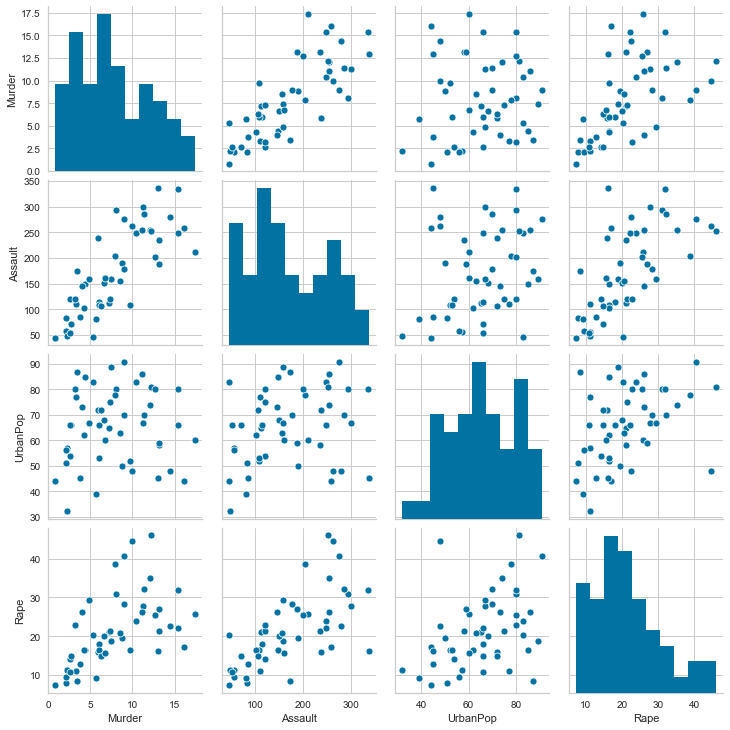

In [8]:
sns.pairplot(data)

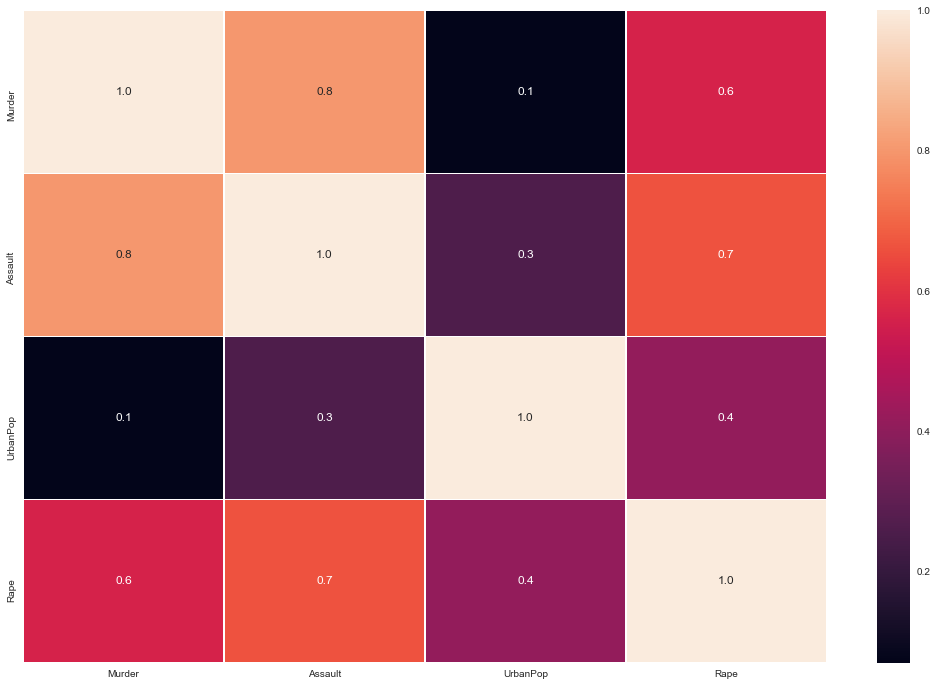

In [9]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [10]:
df = data.set_index('States')
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
# Standardizing the Data
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

#### KMeans Clustering

In [12]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,50.076563
5,6,45.431718
6,7,40.110132
7,8,37.046053
8,9,30.641136
9,10,28.909480


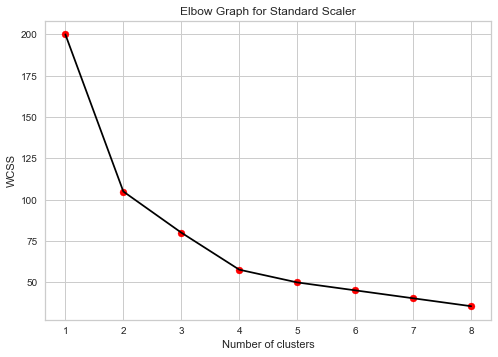

In [13]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As seen from the elbow graph, the slope changes at 2. However, since spltting the dataset into 2 groups would not be very beneficial, we further evaluate clusters for higher values of k.

#### Build KMeans Cluster algorithm using K=6 

In [14]:
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [15]:
# these are nothing but cluster labels...
y_predict_kmeans

array([3, 4, 2, 5, 4, 4, 0, 5, 2, 3, 0, 1, 2, 5, 1, 5, 5, 3, 1, 2, 0, 2,
       1, 3, 5, 1, 1, 4, 1, 0, 2, 2, 3, 1, 5, 5, 5, 5, 0, 3, 1, 3, 2, 0,
       1, 5, 5, 1, 1, 5])

In [16]:
model_kmeans.labels_

array([3, 4, 2, 5, 4, 4, 0, 5, 2, 3, 0, 1, 2, 5, 1, 5, 5, 3, 1, 2, 0, 2,
       1, 3, 5, 1, 1, 4, 1, 0, 2, 2, 3, 1, 5, 5, 5, 5, 0, 3, 1, 3, 2, 0,
       1, 5, 5, 1, 1, 5])

In [17]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.76257011, -0.53850456,  1.25337729, -0.53550482],
       [-1.08919812, -1.14860501, -0.93910247, -1.01363413],
       [ 0.87540173,  1.22260495,  0.83465436,  0.85799046],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.4608354 ,  0.94533247,  0.6252929 ,  2.28833405],
       [-0.18275707, -0.26002774,  0.00526088, -0.07562684]])

In [18]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

43.92746404497574

In [19]:
#Assign clusters to the data set
df = pd.read_csv('crime_data.csv')

#Renaming the Unnamed: 0 Column into States
df.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
df['Kmeans_label'] = model_kmeans.labels_


In [20]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,4.500000,126.333333,83.500000,16.266667
1,3.091667,76.000000,52.083333,11.833333
2,11.562500,271.625000,77.500000,29.187500
3,14.671429,251.285714,54.285714,21.685714
4,9.775000,248.750000,74.500000,42.450000
5,7.000000,149.307692,65.615385,20.530769


#### Hierarchical Clustering Algorithm

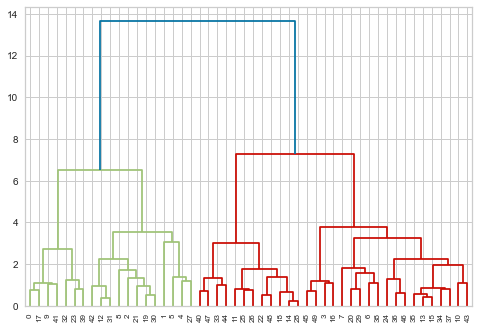

In [21]:
Dendrogram1 = sch.dendrogram(sch.linkage(std_df, method = "ward",optimal_ordering=False))

In [22]:
hie_cluster1 = AgglomerativeClustering(n_clusters=3,linkage="ward")
hie_labels1 = hie_cluster1.fit_predict(std_df)

In [23]:
df_cluster = pd.DataFrame(hie_labels1,columns=['Clusters'])
df_cluster.head()

,Clusters
0,0
1,0
2,0
3,1
4,0


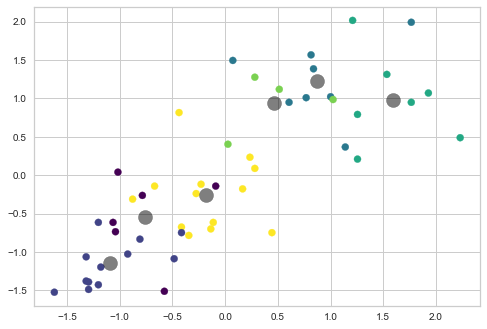

In [24]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

#### DBSCAN

In [25]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [26]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [27]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
# -1 are the noise points in our dataset and the rest are the clusters

# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

,States,Murder,Assault,UrbanPop,Rape,Kmeans_label,DBSCAN_labels
0,Alabama,13.2,236,58,21.2,3,0
1,Alaska,10.0,263,48,44.5,4,0
2,Arizona,8.1,294,80,31.0,2,0
3,Arkansas,8.8,190,50,19.5,5,0
4,California,9.0,276,91,40.6,4,0


In [29]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,
0,7.788,170.76,65.54,21.232,2.6


In [30]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [31]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.788,NaN
Assault,170.760,NaN
UrbanPop,65.540,NaN
Rape,21.232,NaN
Kmeans_label,2.600,NaN
DBSCAN_labels,0.000,NaN
States,NaN,NaN


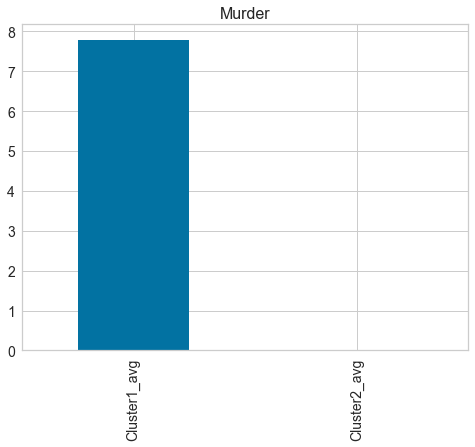

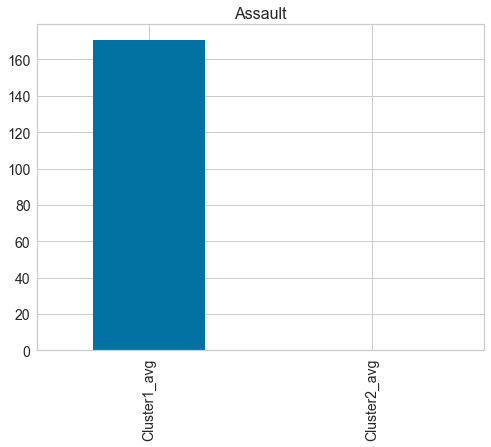

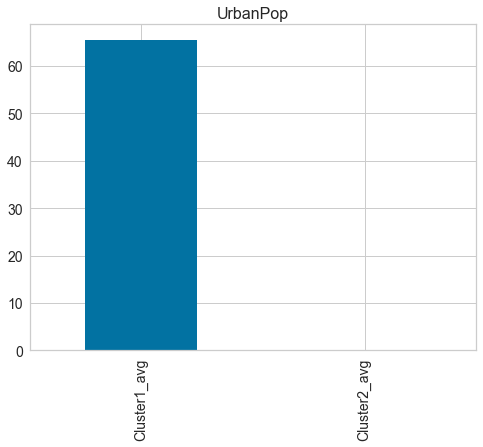

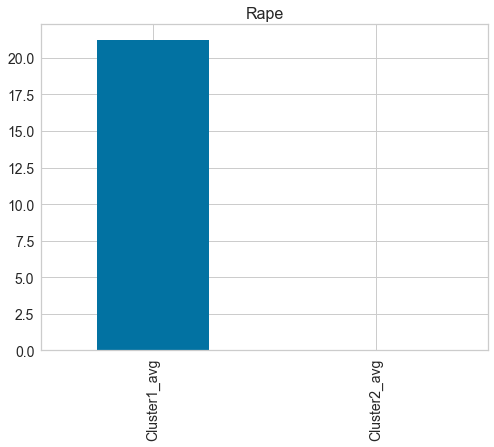

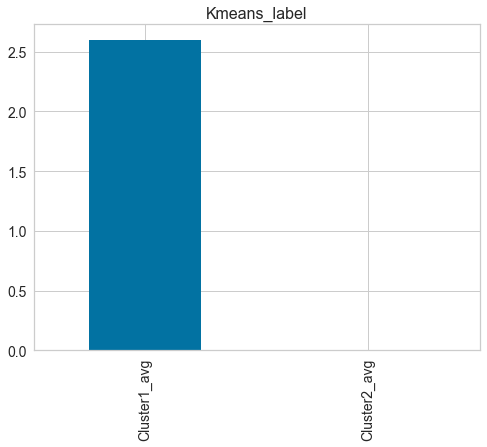

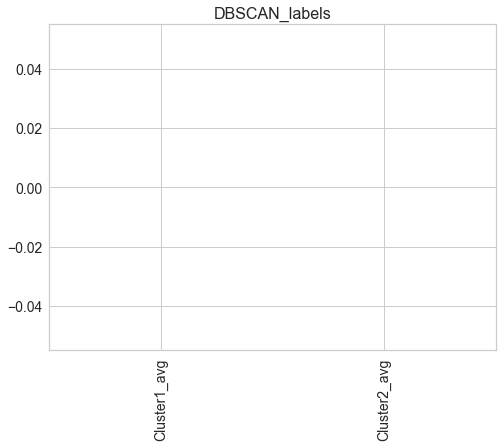

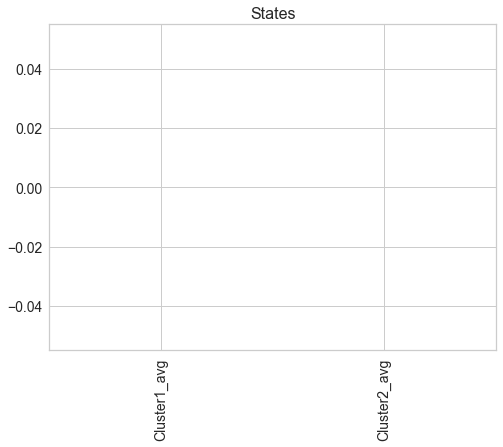

In [32]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()